# APS TRANSCAL 
##### Caio Tieri, Felipe Trintim, Rafael Coca e Thomas Chabro

___
##   1   (4,0 pontos)



$ \frac {d^2x}{dt^2} - \frac{hP}{kA _{tr}} \cdot (T - T _{\inf}) = \frac{1}{\alpha} \cdot \frac{dT}{dt} $

$ \therefore \frac{T^l _{i + 1} - 2 T^l _{i} + T^l _{i - 1}}{\Delta x^2} - \frac{hP}{k A _{tr}} \cdot (T - T _{inf}) = \frac{T^{l+1} _{i} - T^l _{i}}{\alpha \cdot \Delta t}$

$ \therefore (\frac{T^l _{i + 1} - 2 T^l _{i} + T^l _{i - 1}}{\Delta x^2} - \frac{hP}{k A _{tr}} \cdot (T - T _{inf})) \cdot \alpha \cdot \Delta t + T^l _{i} = T^{l + 1} _{i}$

___
##   2   (4,0 pontos)

imports

In [151]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



inicializando variaveis

In [152]:
tol = 1 * 10**-10
l = 300 * 10**-3
d = 5 * 1*10**-3
r = d/2
p = 2 * pi * r
density = 2700
k = 180
c = 896
t = 25 + 273
tb = 100 + 273
tinf = 50 + 273
h = 50
alpha = k/(density*c)

funcao

In [153]:
def funcao(density, calor_especifico, k, h, t_fluido, t_base, raio, comprimento, dx, tempo):
    alpha = k/(density*calor_especifico)
    r = raio
    t = tempo
    l = comprimento   
    tinf = t_fluido
    tb = t_base
    atr = pi * r**2
    p = 2 * pi * r
    dt = ((dx**2)/(alpha*((h*p*dx**2)/(k*atr)) +2)) * 0.9

    listax = np.arange(0, l+dx, dx)
    listay = np.arange(0, t+dt, dt)

    T = np.zeros((len(listay), len(listax)))

    T[:, 0] = tb
    T[:,-1] = 25+273
    

    for i in range(1, len(listay)-1):
        for j in range(0, len(listax)-1):
            T[i+1,j] = ( ( (T[i,j+1] - 2*T[i,j] + T[i,j-1]) / (dx**2) ) - (((h*p) / (k*atr)) * (tb - tinf)) ) * alpha * dt + T[i,j]
            # T[i,j+1] = ( ( (T[i+1,j] - 2*T[i,j] + T[i-1,j]) / (dx**2) ) ) * alpha * dt + T[i,j]

    return T, listax, listay




In [154]:
tol = 1 * 10**-10
l = 300 * 10**-3
d = 5 * 1*10**-3
r = d/2
p = 2 * pi * r
density = 2700
k = 180
c = 896
t = 25 + 273
tb = 100 + 273
tinf = 50 + 273
h = 50
alpha = k/(density*c)

temp, posicao, tempo = funcao(density, c, k, h, tinf, tb, r, l, 0.01, 10)
print(temp)

[[ 3.73000000e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  2.98000000e+02]
 [ 3.73000000e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  2.98000000e+02]
 [ 3.72984963e+02  1.24516266e-02 -3.72023502e-05 ... -3.72023502e-05
   9.94046797e-03  2.98000000e+02]
 ...
 [ 2.39045165e+02  1.84009005e+02  1.35244957e+02 ...  1.74907059e+02
   2.33994245e+02  2.98000000e+02]
 [ 2.39045259e+02  1.84009178e+02  1.35245182e+02 ...  1.74907288e+02
   2.33994373e+02  2.98000000e+02]
 [ 2.39045353e+02  1.84009351e+02  1.35245407e+02 ...  1.74907516e+02
   2.33994500e+02  2.98000000e+02]]


222224


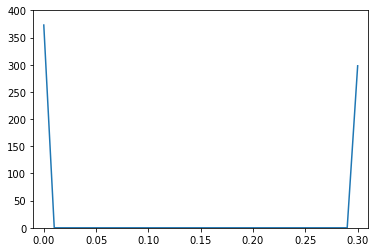

In [163]:
#plota ultimo valor de temp pela posicao
print(len(temp))


plt.plot(posicao, temp[0])
plt.axis([-0.01, 0.31, 0, 400])

plt.show()